In [ ]:
#Import modules
import numpy as np

import pandas as pd
import seaborn as sns
import pickle
import time
import timeit



import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency



import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_pre_process = pd.read_csv('modelling_capstone.csv')

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
data_pre_process.head()

,accident_no,vehicle_id,sex,age_group,inj_level_desc,seating_position,helmet_belt_worn,road_user_type,road_user_type_desc,accidentdate,accidenttime,accident_type_desc,day_week_description,dca_description,light_condition_desc,no_persons,no_persons_killed,road_geometry,road_geometry_desc,severity,speed_zone,surface_cond_desc,road_name,road_type,distance_location,lga_name,region_name,deg_urban_name,lat,long,postcode_no,atmosph_cond_desc,vehicle_year_manuf,road_surface_type_desc_x,vehicle_type_desc_x,total_no_occupants,traffic_control_desc_x,severity_level,year_of_vehicle,road_surface_type_desc_y,reg_state,vehicle_body_style,vehicle_make,vehicle_model,condensed_vehicle_type,condensed_total_occupants,condensed_no_of_vehicles,inj_binary,severe_outcome,condensed_years,weekday,weekend,seasons,time_of_day,month,season,road_type_group,seatbelt_restraint_type_desc,safety_equipment_worn
0,T20060000010,A,M,60+,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6.0,0.0,1.0,Cross intersection,3.0,60.0,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,1996.0,Paved,Car,2.0,Stop-go lights,1.0,10.0,Paved,V,SEDAN,MITSUB,MAGNA,Car,2,3+,0.0,0.0,10.0,True,False,1.0,Afternoon (14-16),1.0,Summer,STREET,Seatbelt worn,Yes
1,T20060000010,B,F,60+,Other injury,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6.0,0.0,1.0,Cross intersection,3.0,60.0,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2003.0,Paved,Car,1.0,Stop-go lights,2.0,3.0,Paved,V,COUPE,UNKN,GETZ,Car,1,3+,1.0,0.0,3.0,True,False,1.0,Afternoon (14-16),1.0,Summer,STREET,Seatbelt worn,Yes
2,T20060000010,C,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,12:42:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,6.0,0.0,1.0,Cross intersection,3.0,60.0,Dry,FOSTER,STREET,0.0,DANDENONG,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.988622,145.218049,3175.0,Clear,2001.0,Paved,Taxi,3.0,Stop-go lights,1.0,5.0,Paved,V,SEDAN,FORD,FALCON,Car,3,3+,0.0,0.0,5.0,True,False,1.0,Afternoon (14-16),1.0,Summer,STREET,Seatbelt worn,Yes
3,T20060000018,A,M,30-39,Not injured,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4.0,0.0,2.0,T intersection,3.0,70.0,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1998.0,Paved,Utility,1.0,No control,1.0,8.0,Paved,V,DC UTE,TOYOTA,HILXU,Car,1,2,0.0,0.0,8.0,True,False,1.0,Evening (18-22),1.0,Summer,ROAD,Seatbelt worn,Yes
4,T20060000018,B,F,17-21,Other injury,D,1,2,Drivers,2006-01-13,19:10:00,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),Day,4.0,0.0,2.0,T intersection,3.0,70.0,Dry,HALLAM,ROAD,70.0,CASEY,METROPOLITAN SOUTH EAST REGION,MELB_URBAN,-37.990920,145.276320,3804.0,Clear,1991.0,Paved,Car,3.0,Giveway sign,2.0,15.0,Paved,V,SEDAN,SUBARU,LIBER,Car,3,2,1.0,0.0,15.0,True,False,1.0,Evening (18-22),1.0,Summer,ROAD,Seatbelt worn,Yes


In [ ]:
# drop values where speed zone has incorrect data e.g. > 200km/hr
data_pre_process = data_pre_process[data_pre_process['speed_zone'] < 200]

In [ ]:
data_pre_process['speed_zone'].value_counts()

60.0     2727
100.0    1147
50.0     1060
80.0     1041
70.0      643
40.0      103
90.0       68
110.0      47
75.0       16
Name: speed_zone, dtype: int64

In [ ]:
data_pre_process['severe_outcome'].value_counts()

0.0    5486
1.0    1366
Name: severe_outcome, dtype: int64

In [ ]:
# Define the target values
target = ['Drivers', 'Motorcyclists']

# Filter the DataFrame based on Road_User_Type_Desc column
df = data_pre_process[data_pre_process['road_user_type_desc'].isin(target)]

# Generate summary of the filtered DataFrame
summary = df.describe()
summary

,helmet_belt_worn,road_user_type,no_persons,no_persons_killed,road_geometry,severity,speed_zone,distance_location,lat,long,postcode_no,vehicle_year_manuf,total_no_occupants,severity_level,year_of_vehicle,inj_binary,severe_outcome,condensed_years,seasons,month
count,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6483.000000,6269.000000,6483.000000,6483.000000,6269.000000,6483.000000,6483.000000,6237.000000,6483.000000,6483.000000
mean,2.534166,2.193583,2.904057,0.020052,3.215641,2.589850,70.028536,106.619929,-37.725508,144.977546,3289.013728,1995.224119,1.428197,1.741632,9.815920,0.750116,0.194509,9.453904,1.887244,4.047509
std,2.961315,0.631143,1.713439,0.161657,1.805684,0.527903,17.296753,310.812284,0.583474,0.759649,294.303108,44.244711,0.854533,0.762051,7.167603,0.781338,0.395853,6.037514,1.027437,3.322373
min,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,40.000000,-1.000000,-38.938340,141.000970,3000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,2.000000,60.000000,0.000000,-37.953298,144.915455,3075.000000,1992.000000,1.000000,1.000000,4.000000,0.000000,0.000000,4.000000,1.000000,2.000000
50%,1.000000,2.000000,2.000000,0.000000,2.000000,3.000000,60.000000,7.000000,-37.825409,145.044720,3170.000000,1998.000000,1.000000,2.000000,8.000000,1.000000,0.000000,9.000000,2.000000,3.000000
75%,1.000000,2.000000,4.000000,0.000000,5.000000,3.000000,80.000000,65.000000,-37.740425,145.197479,3431.500000,2002.000000,2.000000,2.000000,14.000000,1.000000,0.000000,14.000000,2.000000,6.000000
max,9.000000,7.000000,17.000000,6.000000,9.000000,3.000000,110.000000,5609.000000,-34.115581,149.205166,3996.000000,2006.000000,13.000000,3.000000,101.000000,3.000000,1.000000,20.000000,4.000000,12.000000


In [ ]:
df.columns

Index(['accident_no', 'vehicle_id', 'sex', 'age_group', 'inj_level_desc',
       'seating_position', 'helmet_belt_worn', 'road_user_type',
       'road_user_type_desc', 'accidentdate', 'accidenttime',
       'accident_type_desc', 'day_week_description', 'dca_description',
       'light_condition_desc', 'no_persons', 'no_persons_killed',
       'road_geometry', 'road_geometry_desc', 'severity', 'speed_zone',
       'surface_cond_desc', 'road_name', 'road_type', 'distance_location',
       'lga_name', 'region_name', 'deg_urban_name', 'lat', 'long',
       'postcode_no', 'atmosph_cond_desc', 'vehicle_year_manuf',
       'road_surface_type_desc_x', 'vehicle_type_desc_x', 'total_no_occupants',
       'traffic_control_desc_x', 'severity_level', 'year_of_vehicle',
       'road_surface_type_desc_y', 'reg_state', 'vehicle_body_style',
       'vehicle_make', 'vehicle_model', 'condensed_vehicle_type',
       'condensed_total_occupants', 'condensed_no_of_vehicles', 'inj_binary',
       'severe_out

In [ ]:
# Define numerical and categorical columns
numerical_cols = [ 'no_persons', 'speed_zone',
                  'condensed_years', 'total_no_occupants',
                  'year_of_vehicle']

cat_cols = ['sex' , 'accident_type_desc',
            'road_surface_type_desc_x', 'surface_cond_desc',
            'atmosph_cond_desc', 'light_condition_desc', 'deg_urban_name',
            'age_group', 'day_week_description', 'seatbelt_restraint_type_desc','traffic_control_desc_x','road_type_group',
           'condensed_vehicle_type','time_of_day','road_geometry_desc' ,'condensed_no_of_vehicles','season','road_user_type_desc']

indexing_cols = ['accident_no', 'severe_outcome', 'accidentdate',
                 'accidenttime', 'road_user_type_desc']

log_cols = [ 'no_persons','total_no_occupants',  'speed_zone',]


all_features_cols = numerical_cols + cat_cols

# Create a subset DataFrame with the selected columns
subset_df = df[all_features_cols]

# Display the subset DataFrame
subset_df.head()

,no_persons,speed_zone,condensed_years,total_no_occupants,year_of_vehicle,sex,accident_type_desc,road_surface_type_desc_x,surface_cond_desc,atmosph_cond_desc,light_condition_desc,deg_urban_name,age_group,day_week_description,seatbelt_restraint_type_desc,traffic_control_desc_x,road_type_group,condensed_vehicle_type,time_of_day,road_geometry_desc,condensed_no_of_vehicles,season,road_user_type_desc
0,6.0,60.0,10.0,2.0,10.0,M,Collision with vehicle,Paved,Dry,Clear,Day,MELB_URBAN,60+,Friday,Seatbelt worn,Stop-go lights,STREET,Car,Afternoon (14-16),Cross intersection,3+,Summer,Drivers
1,6.0,60.0,3.0,1.0,3.0,F,Collision with vehicle,Paved,Dry,Clear,Day,MELB_URBAN,60+,Friday,Seatbelt worn,Stop-go lights,STREET,Car,Afternoon (14-16),Cross intersection,3+,Summer,Drivers
2,6.0,60.0,5.0,3.0,5.0,M,Collision with vehicle,Paved,Dry,Clear,Day,MELB_URBAN,30-39,Friday,Seatbelt worn,Stop-go lights,STREET,Car,Afternoon (14-16),Cross intersection,3+,Summer,Drivers
3,4.0,70.0,8.0,1.0,8.0,M,Collision with vehicle,Paved,Dry,Clear,Day,MELB_URBAN,30-39,Friday,Seatbelt worn,No control,ROAD,Car,Evening (18-22),T intersection,2,Summer,Drivers
4,4.0,70.0,15.0,3.0,15.0,F,Collision with vehicle,Paved,Dry,Clear,Day,MELB_URBAN,17-21,Friday,Seatbelt worn,Giveway sign,ROAD,Car,Evening (18-22),T intersection,2,Summer,Drivers


In [ ]:
subset_df.isnull().sum()

no_persons                        0
speed_zone                        0
condensed_years                 246
total_no_occupants                0
year_of_vehicle                 214
sex                               0
accident_type_desc                0
road_surface_type_desc_x          0
surface_cond_desc                 0
atmosph_cond_desc                 0
light_condition_desc              0
deg_urban_name                    0
age_group                         0
day_week_description              0
seatbelt_restraint_type_desc    930
traffic_control_desc_x            0
road_type_group                   0
condensed_vehicle_type            0
time_of_day                       0
road_geometry_desc                0
condensed_no_of_vehicles          0
season                            0
road_user_type_desc               0
dtype: int64

In [ ]:
# Random imputation for 'condensed_years'
mask_years = subset_df['condensed_years'].isnull()
num_unknown_years = mask_years.sum()
unique_years = subset_df.loc[~mask_years, 'condensed_years'].unique()
random_indices_years = np.random.choice(len(unique_years), size=num_unknown_years)
subset_df.loc[mask_years, 'condensed_years'] = unique_years[random_indices_years]

# Random imputation for 'seatbelt_restraint_type_desc'
mask_seatbelt = subset_df['seatbelt_restraint_type_desc'] == 'Unknown'
num_unknown_seatbelt = mask_seatbelt.sum()
unique_seatbelt = subset_df.loc[~mask_seatbelt, 'seatbelt_restraint_type_desc'].unique()
random_indices_seatbelt = np.random.choice(len(unique_seatbelt), size=num_unknown_seatbelt)
subset_df.loc[mask_seatbelt, 'seatbelt_restraint_type_desc'] = unique_seatbelt[random_indices_seatbelt]

# Random imputation for 'year_of_vehicle'
mask_vehicle_year = subset_df['year_of_vehicle'].isnull()
num_unknown_vehicle_year = mask_vehicle_year.sum()
unique_vehicle_years = subset_df.loc[~mask_vehicle_year, 'year_of_vehicle'].unique()
random_indices_vehicle_year = np.random.choice(len(unique_vehicle_years), size=num_unknown_vehicle_year)
subset_df.loc[mask_vehicle_year, 'year_of_vehicle'] = unique_vehicle_years[random_indices_vehicle_year]


In [ ]:
subset_df['seatbelt_restraint_type_desc'] = subset_df['seatbelt_restraint_type_desc'].astype(str)

<ipython-input-17-15df22dc19aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['seatbelt_restraint_type_desc'] = subset_df['seatbelt_restraint_type_desc'].astype(str)


In [ ]:
subset_df.isnull().sum()

no_persons                      0
speed_zone                      0
condensed_years                 0
total_no_occupants              0
year_of_vehicle                 0
sex                             0
accident_type_desc              0
road_surface_type_desc_x        0
surface_cond_desc               0
atmosph_cond_desc               0
light_condition_desc            0
deg_urban_name                  0
age_group                       0
day_week_description            0
seatbelt_restraint_type_desc    0
traffic_control_desc_x          0
road_type_group                 0
condensed_vehicle_type          0
time_of_day                     0
road_geometry_desc              0
condensed_no_of_vehicles        0
season                          0
road_user_type_desc             0
dtype: int64

In [ ]:
subset_df.dtypes

no_persons                      float64
speed_zone                      float64
condensed_years                 float64
total_no_occupants              float64
year_of_vehicle                 float64
sex                              object
accident_type_desc               object
road_surface_type_desc_x         object
surface_cond_desc                object
atmosph_cond_desc                object
light_condition_desc             object
deg_urban_name                   object
age_group                        object
day_week_description             object
seatbelt_restraint_type_desc     object
traffic_control_desc_x           object
road_type_group                  object
condensed_vehicle_type           object
time_of_day                      object
road_geometry_desc               object
condensed_no_of_vehicles         object
season                           object
road_user_type_desc              object
dtype: object

<ipython-input-20-c8db20f8fec8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = pd.to_numeric(new_vals)


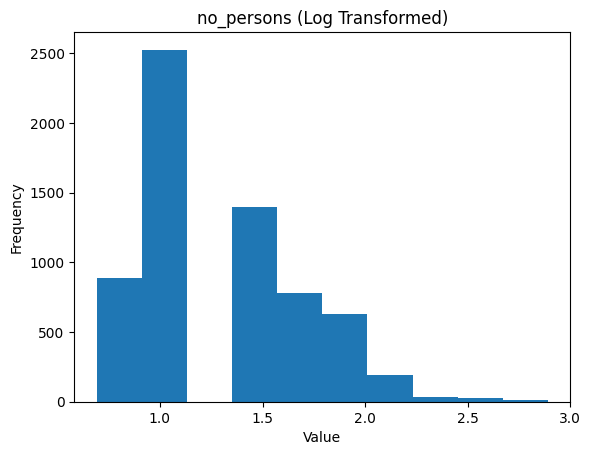

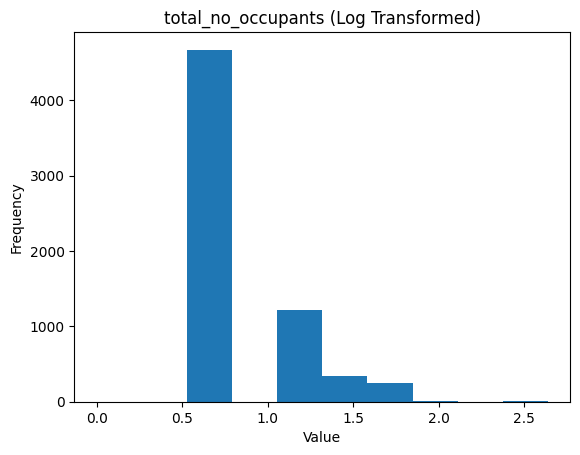

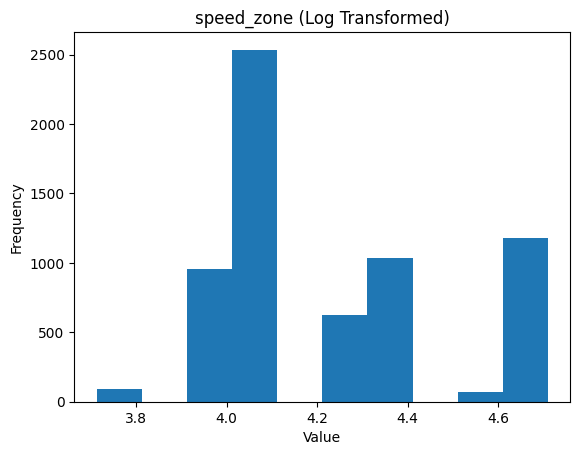

In [ ]:
from scipy.stats import skew
import matplotlib.pyplot as plt

log_df = df[log_cols]

for name in log_df.columns:
    column_vector = log_df[name]
    column_vector = pd.to_numeric(column_vector, errors='coerce')
    skewness = skew(column_vector)

    if skewness < -0.5:
        constant = column_vector.max() + 1
        new_vals = constant - column_vector
        new_vals = np.log(new_vals)
        df[name] = pd.to_numeric(new_vals)
        # Plot histogram of transformed values
        plt.hist(new_vals)
        plt.title(f'{name} (Log Transformed)')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    elif skewness > 0.5:
        constant = 1
        new_vals = np.log(column_vector + constant)
        df[name] = pd.to_numeric(new_vals)
        # Plot histogram of transformed values
        plt.hist(new_vals)
        plt.title(f'{name} (Log Transformed)')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

In [ ]:

category_df = df[cat_cols]
category_df = pd.get_dummies(category_df, prefix_sep='_')

category_df = category_df.astype('category')

base_df = df[indexing_cols]
numerical_df = df[numerical_cols]
category_df.head()

,sex_F,sex_M,sex_U,accident_type_desc_Collision with a fixed object,accident_type_desc_Collision with vehicle,accident_type_desc_Fall from or in moving vehicle,accident_type_desc_No collision and no object struck,accident_type_desc_Other accident,accident_type_desc_Struck Pedestrian,accident_type_desc_Struck animal,accident_type_desc_Vehicle overturned (no collision),accident_type_desc_collision with some other object,road_surface_type_desc_x_Gravel,road_surface_type_desc_x_Paved,road_surface_type_desc_x_Unpaved,surface_cond_desc_Dry,surface_cond_desc_Icy,surface_cond_desc_Muddy,surface_cond_desc_Snowy,surface_cond_desc_Wet,atmosph_cond_desc_Clear,atmosph_cond_desc_Dust,atmosph_cond_desc_Fog,atmosph_cond_desc_Raining,atmosph_cond_desc_Smoke,atmosph_cond_desc_Snowing,atmosph_cond_desc_Strong winds,light_condition_desc_Dark No street lights,light_condition_desc_Dark Street lights off,light_condition_desc_Dark Street lights on,light_condition_desc_Dark Street lights unknown,light_condition_desc_Day,light_condition_desc_Dusk/Dawn,deg_urban_name_LARGE_PROVINCIAL_CITIES,deg_urban_name_MELBOURNE_CBD,deg_urban_name_MELB_URBAN,deg_urban_name_RURAL_VICTORIA,deg_urban_name_SMALL_CITIES,deg_urban_name_SMALL_TOWNS,deg_urban_name_TOWNS,age_group_16-17,age_group_17-21,age_group_22-25,age_group_26-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+,age_group_Under 17,day_week_description_Friday,day_week_description_Monday,day_week_description_Saturday,day_week_description_Sunday,day_week_description_Thursday,day_week_description_Tuesday,day_week_description_Wednesday,seatbelt_restraint_type_desc_Crash helmet not worn,seatbelt_restraint_type_desc_Crash helmet worn,seatbelt_restraint_type_desc_Not appropriate,seatbelt_restraint_type_desc_Seatbelt not worn,seatbelt_restraint_type_desc_Seatbelt worn,seatbelt_restraint_type_desc_Seatbelt/restraint not fitted,traffic_control_desc_x_Flashing lights,traffic_control_desc_x_Giveway sign,traffic_control_desc_x_No control,traffic_control_desc_x_Other,traffic_control_desc_x_Out of order,traffic_control_desc_x_Ped. crossing,traffic_control_desc_x_Ped. lights,traffic_control_desc_x_Police,traffic_control_desc_x_RX Bells/Lights,traffic_control_desc_x_RX Gates/Booms,traffic_control_desc_x_RX No control,traffic_control_desc_x_Roundabout,traffic_control_desc_x_School Flags,traffic_control_desc_x_School No flags,traffic_control_desc_x_Stop sign,traffic_control_desc_x_Stop-go lights,road_type_group_AVENUE,road_type_group_DRIVE,road_type_group_FREEWAY,road_type_group_HIGHWAY,road_type_group_Other,road_type_group_ROAD,road_type_group_STREET,condensed_vehicle_type_Bus/Coach,condensed_vehicle_type_Car,condensed_vehicle_type_Heavy Vehicle,condensed_vehicle_type_Light Commercial Vehicle,condensed_vehicle_type_Motorcycle,condensed_vehicle_type_Other,condensed_vehicle_type_Prime Mover,condensed_vehicle_type_Train,condensed_vehicle_type_Tram,time_of_day_After Work Rush (16-18),time_of_day_Afternoon (14-16),time_of_day_Day (10-12),time_of_day_Evening (18-22),time_of_day_Lunch Rush (12-14),time_of_day_Morning Rush (6-10),road_geometry_desc_Cross intersection,road_geometry_desc_Dead end,road_geometry_desc_Multiple intersection,road_geometry_desc_Not at intersection,road_geometry_desc_T intersection,road_geometry_desc_Y intersection,condensed_no_of_vehicles_1,condensed_no_of_vehicles_2,condensed_no_of_vehicles_3+,season_Autumn,season_Spring,season_Summer,season_Winter,road_user_type_desc_Drivers,road_user_type_desc_Motorcyclists
0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,1

In [ ]:
log_transformed_df = pd.DataFrame()  # Create an empty DataFrame for log-transformed columns

for name in log_df.columns:
    column_vector = log_df[name]
    column_vector = pd.to_numeric(column_vector, errors='coerce')
    skewness = skew(column_vector)

    if skewness < -0.5:
        constant = column_vector.max() + 1
        new_vals = constant - column_vector
        new_vals = np.log(new_vals)
        log_transformed_df[name] = pd.to_numeric(new_vals)

    elif skewness > 0.5:
        constant = 1
        new_vals = np.log(column_vector + constant)
        log_transformed_df[name] = pd.to_numeric(new_vals)

# Concatenate the original DataFrame and the log-transformed DataFrame
final_df = pd.concat([base_df, category_df, numerical_df], axis=1)

In [ ]:
final_df.head()

,accident_no,severe_outcome,accidentdate,accidenttime,road_user_type_desc,sex_F,sex_M,sex_U,accident_type_desc_Collision with a fixed object,accident_type_desc_Collision with vehicle,accident_type_desc_Fall from or in moving vehicle,accident_type_desc_No collision and no object struck,accident_type_desc_Other accident,accident_type_desc_Struck Pedestrian,accident_type_desc_Struck animal,accident_type_desc_Vehicle overturned (no collision),accident_type_desc_collision with some other object,road_surface_type_desc_x_Gravel,road_surface_type_desc_x_Paved,road_surface_type_desc_x_Unpaved,surface_cond_desc_Dry,surface_cond_desc_Icy,surface_cond_desc_Muddy,surface_cond_desc_Snowy,surface_cond_desc_Wet,atmosph_cond_desc_Clear,atmosph_cond_desc_Dust,atmosph_cond_desc_Fog,atmosph_cond_desc_Raining,atmosph_cond_desc_Smoke,atmosph_cond_desc_Snowing,atmosph_cond_desc_Strong winds,light_condition_desc_Dark No street lights,light_condition_desc_Dark Street lights off,light_condition_desc_Dark Street lights on,light_condition_desc_Dark Street lights unknown,light_condition_desc_Day,light_condition_desc_Dusk/Dawn,deg_urban_name_LARGE_PROVINCIAL_CITIES,deg_urban_name_MELBOURNE_CBD,deg_urban_name_MELB_URBAN,deg_urban_name_RURAL_VICTORIA,deg_urban_name_SMALL_CITIES,deg_urban_name_SMALL_TOWNS,deg_urban_name_TOWNS,age_group_16-17,age_group_17-21,age_group_22-25,age_group_26-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+,age_group_Under 17,day_week_description_Friday,day_week_description_Monday,day_week_description_Saturday,day_week_description_Sunday,day_week_description_Thursday,day_week_description_Tuesday,day_week_description_Wednesday,seatbelt_restraint_type_desc_Crash helmet not worn,seatbelt_restraint_type_desc_Crash helmet worn,seatbelt_restraint_type_desc_Not appropriate,seatbelt_restraint_type_desc_Seatbelt not worn,seatbelt_restraint_type_desc_Seatbelt worn,seatbelt_restraint_type_desc_Seatbelt/restraint not fitted,traffic_control_desc_x_Flashing lights,traffic_control_desc_x_Giveway sign,traffic_control_desc_x_No control,traffic_control_desc_x_Other,traffic_control_desc_x_Out of order,traffic_control_desc_x_Ped. crossing,traffic_control_desc_x_Ped. lights,traffic_control_desc_x_Police,traffic_control_desc_x_RX Bells/Lights,traffic_control_desc_x_RX Gates/Booms,traffic_control_desc_x_RX No control,traffic_control_desc_x_Roundabout,traffic_control_desc_x_School Flags,traffic_control_desc_x_School No flags,traffic_control_desc_x_Stop sign,traffic_control_desc_x_Stop-go lights,road_type_group_AVENUE,road_type_group_DRIVE,road_type_group_FREEWAY,road_type_group_HIGHWAY,road_type_group_Other,road_type_group_ROAD,road_type_group_STREET,condensed_vehicle_type_Bus/Coach,condensed_vehicle_type_Car,condensed_vehicle_type_Heavy Vehicle,condensed_vehicle_type_Light Commercial Vehicle,condensed_vehicle_type_Motorcycle,condensed_vehicle_type_Other,condensed_vehicle_type_Prime Mover,condensed_vehicle_type_Train,condensed_vehicle_type_Tram,time_of_day_After Work Rush (16-18),time_of_day_Afternoon (14-16),time_of_day_Day (10-12),time_of_day_Evening (18-22),time_of_day_Lunch Rush (12-14),time_of_day_Morning Rush (6-10),road_geometry_desc_Cross intersection,road_geometry_desc_Dead end,road_geometry_desc_Multiple intersection,road_geometry_desc_Not at intersection,road_geometry_desc_T intersection,road_geometry_desc_Y intersection,condensed_no_of_vehicles_1,condensed_no_of_vehicles_2,condensed_no_of_vehicles_3+,season_Autumn,season_Spring,season_Summer,season_Winter,road_user_type_desc_Drivers,road_user_type_desc_Motorcyclists,no_persons,speed_zone,condensed_years,total_no_occupants,year_of_vehicle
0,T20060000010,0.0,2006-01-13,12:42:00,Drivers,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1.945910,4.110874,10.0,1.098612,10.0
1,T20060000010,0.0,2006-01-13,12:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract the numeric columns from final_df
numerical_cols = final_df[numerical_cols]

# Standardize the numeric columns
scaler = StandardScaler()
scaled_numerical_cols = scaler.fit_transform(numerical_cols)

# Convert the scaled numerical columns back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_cols, columns=numerical_cols.columns)

# Concatenate the standardized numerical columns with the categorical columns and base_df
final_df = pd.concat([base_df, category_df, scaled_numerical_df], axis=1)

In [ ]:
for column in final_df.columns:
    print(column)

accident_no
severe_outcome
accidentdate
accidenttime
road_user_type_desc
sex_F
sex_M
sex_U
accident_type_desc_Collision with a fixed object
accident_type_desc_Collision with vehicle
accident_type_desc_Fall from or in moving vehicle
accident_type_desc_No collision and no object struck
accident_type_desc_Other accident
accident_type_desc_Struck Pedestrian
accident_type_desc_Struck animal
accident_type_desc_Vehicle overturned (no collision)
accident_type_desc_collision with some other object
road_surface_type_desc_x_Gravel
road_surface_type_desc_x_Paved
road_surface_type_desc_x_Unpaved
surface_cond_desc_Dry
surface_cond_desc_Icy
surface_cond_desc_Muddy
surface_cond_desc_Snowy
surface_cond_desc_Wet
atmosph_cond_desc_Clear
atmosph_cond_desc_Dust
atmosph_cond_desc_Fog
atmosph_cond_desc_Raining
atmosph_cond_desc_Smoke
atmosph_cond_desc_Snowing
atmosph_cond_desc_Strong winds
light_condition_desc_Dark No street lights
light_condition_desc_Dark Street lights off
light_condition_desc_Dark Street 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
category_df.columns

Index(['sex_F', 'sex_M', 'sex_U',
       'accident_type_desc_Collision with a fixed object',
       'accident_type_desc_Collision with vehicle',
       'accident_type_desc_Fall from or in moving vehicle',
       'accident_type_desc_No collision and no object struck',
       'accident_type_desc_Other accident',
       'accident_type_desc_Struck Pedestrian',
       'accident_type_desc_Struck animal',
       ...
       'road_geometry_desc_Y intersection', 'condensed_no_of_vehicles_1',
       'condensed_no_of_vehicles_2', 'condensed_no_of_vehicles_3+',
       'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter',
       'road_user_type_desc_Drivers', 'road_user_type_desc_Motorcyclists'],
      dtype='object', length=115)

In [ ]:
final_cols = [ 'severe_outcome',   'accident_type_desc_Collision with a fixed object', 'road_user_type_desc', 'deg_urban_name_RURAL_VICTORIA',
              'accident_type_desc_Collision with vehicle', 'speed_zone', 'no_persons', 'time_of_day_Morning Rush (6-10)', 'total_no_occupants', 'sex_M', 'sex_F', 'accident_type_desc_Fall from or in moving vehicle',
              'accident_type_desc_No collision and no object struck', 'accident_type_desc_Other accident', 'accident_type_desc_Struck Pedestrian', 'road_geometry_desc_Not at intersection', 'light_condition_desc_Dark No street lights',
              'road_type_group_ROAD', 'age_group_60+', 'road_type_group_HIGHWAY', 'day_week_description_Sunday', 'time_of_day_Day (10-12)', 'day_week_description_Saturday', 'light_condition_desc_Dark No street lights', 'age_group_16-17',
              'age_group_17-21', 'road_surface_type_desc_x_Gravel', 'road_surface_type_desc_x_Unpaved', 'surface_cond_desc_Dry', 'surface_cond_desc_Icy', 'surface_cond_desc_Muddy', 'surface_cond_desc_Snowy', 'surface_cond_desc_Wet',
              'atmosph_cond_desc_Clear', 'atmosph_cond_desc_Dust', 'atmosph_cond_desc_Fog', 'atmosph_cond_desc_Raining', 'atmosph_cond_desc_Smoke', 'atmosph_cond_desc_Snowing', 'atmosph_cond_desc_Strong winds','road_user_type_desc_Drivers','road_user_type_desc_Motorcyclists']

final_df_selected = final_df[final_cols]

In [ ]:
final_df_selected['road_user_type_desc'] = final_df_selected['road_user_type_desc'].astype(str)

<ipython-input-28-50457acbfdfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_selected['road_user_type_desc'] = final_df_selected['road_user_type_desc'].astype(str)


In [ ]:
final_df_selected = final_df_selected.drop('road_user_type_desc', axis=1)

In [ ]:
final_df_selected.dtypes

severe_outcome                                           float64
accident_type_desc_Collision with a fixed object        category
deg_urban_name_RURAL_VICTORIA                           category
accident_type_desc_Collision with vehicle               category
speed_zone                                               float64
no_persons                                               float64
time_of_day_Morning Rush (6-10)                         category
total_no_occupants                                       float64
sex_M                                                   category
sex_F                                                   category
accident_type_desc_Fall from or in moving vehicle       category
accident_type_desc_No collision and no object struck    category
accident_type_desc_Other accident                       category
accident_type_desc_Struck Pedestrian                    category
road_geometry_desc_Not at intersection                  category
light_condition_desc_Dark

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into features (X) and target variable (y)
X = final_df_selected.drop('severe_outcome', axis=1)
y = final_df_selected['severe_outcome']

# Handle missing values in X and y
X = X.fillna(0)  # Replace NaN values with 0
y = y.fillna(0)  # Replace NaN values with 0

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply under-sampling to the majority class
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Calculate evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      1104
         1.0       0.41      0.64      0.50       280

    accuracy                           0.74      1384
   macro avg       0.65      0.70      0.67      1384
weighted avg       0.80      0.74      0.76      1384

Confusion Matrix:
[[853 251]
 [102 178]]
Accuracy Score: 0.744942196531792
Precision: 0.4149184149184149
Recall: 0.6357142857142857
AUC: 0.7041796066252588


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into features (X) and target variable (y)
X = final_df_selected.drop('severe_outcome', axis=1)
y = final_df_selected['severe_outcome']

# Handle missing values in X and y
X = X.fillna(0)  # Replace NaN values with 0
y = y.fillna(0)  # Replace NaN values with 0

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# List of thresholds for under-sampling and SMOTE
thresholds = [0.50, 0.65, 0.60, 0.45, 0.50, 0.20]
methods = ['Under Sample Fatality > 0.50', 'Under Sample Fatality > 0.65',
           'Under Sample Fatality > 0.60', 'Under Sample Fatality > 0.45',
           'SMOTE > 0.50', 'SMOTE > 0.20']

# Iterate over each threshold and method
for threshold, method in zip(thresholds, methods):
    print("Method:", method)
    print('-' * 40)

    # Perform under-sampling based on the threshold
    under_sampler = RandomUnderSampler(sampling_strategy=threshold, random_state=42)
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)

    # Display classification report and evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred))

    print('\n')

Method: Under Sample Fatality > 0.50
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1104
         1.0       0.53      0.48      0.50       280

    accuracy                           0.81      1384
   macro avg       0.70      0.69      0.69      1384
weighted avg       0.80      0.81      0.81      1384

Confusion Matrix:
[[987 117]
 [146 134]]
Accuracy Score: 0.809971098265896
Precision: 0.5338645418326693
Recall: 0.4785714285714286
AUC: 0.6862965838509317


Method: Under Sample Fatality > 0.65
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      1104
         1.0       0.52      0.55      0.53       280

    accuracy                           0.80      1384
   macro avg       0.70      0.71      0.70      1384
weighted avg       0.81      0.80      0.81      1384

Confusion Matrix:
[[960 144]
 [126 154]]
Accuracy Score: 0.8049132947976878
Precision: 0.5167785234899329
Recall: 0.55
AUC: 0.7097826086956521


Method: Under Sample Fatality > 0.60
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1104
         1.0       0.53      0.53      0.53       280

    accuracy                           0.81      1384
   macro avg       0.70      0.71      0.70      1384
weighted avg       0.81      0.81      0.81      1384

Confusion Matrix:
[[970 134]
 [131 149]]
Accuracy Score: 0.8085260115606936
P

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1104
         1.0       0.56      0.45      0.50       280

    accuracy                           0.82      1384
   macro avg       0.71      0.68      0.69      1384
weighted avg       0.81      0.82      0.81      1384

Confusion Matrix:
[[1006   98]
 [ 154  126]]
Accuracy Score: 0.8179190751445087
Precision: 0.5625
Recall: 0.45
AUC: 0.6806159420289855


Method: SMOTE > 0.50
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1104
         1.0       0.53      0.48      0.50       280

    accuracy                           0.81      1384
   macro avg       0.70      0.69      0.69      1384
weighted avg       0.80      0.81      0.81      1384

Confusion Matrix:
[[987 117]
 [146 134]]
Accuracy Score: 0.809971098265896
Precision: 0.5338645418326

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Model
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1089
         1.0       0.52      0.18      0.27       282

    accuracy                           0.80      1371
   macro avg       0.67      0.57      0.58      1371
weighted avg       0.76      0.80      0.76      1371

Confusion Matrix:
[[1041   48]
 [ 230   52]]
Accuracy Score: 0.7972283005105762
Precision: 0.52
Recall: 0.18439716312056736
AUC: 0.5701600140671708


Method: Under Sample Fatality > 0.50
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1089
         1.0       0.46      0.42      0.44       282

    accuracy                           0.78      1371
   macro avg       0.66      0.65      0.65      1371
weighted avg       0.77      0.78      0.78      1371

Confusion Matrix:
[[951 138]
 [163 119]]
Accuracy Score: 0.7804522246535376
Precision: 0.46303501945525294
Recall: 0.4219858156028369
AUC: 0.6476320262587187


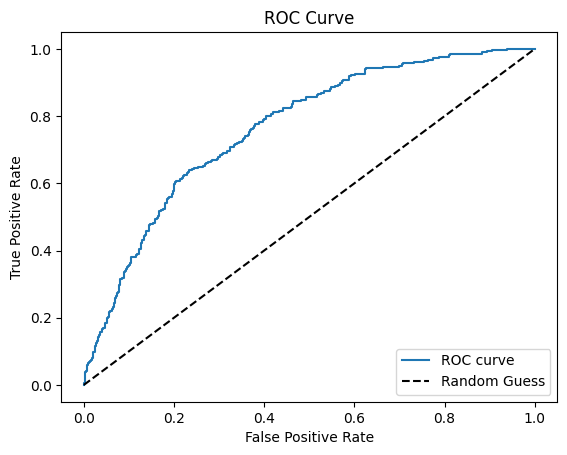



Method: Under Sample Fatality > 0.65
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1089
         1.0       0.44      0.51      0.47       282

    accuracy                           0.77      1371
   macro avg       0.65      0.67      0.66      1371
weighted avg       0.78      0.77      0.77      1371

Confusion Matrix:
[[905 184]
 [137 145]]
Accuracy Score: 0.7658643326039387
Precision: 0.44072948328267475
Recall: 0.5141843971631206
AUC: 0.6726110231912941


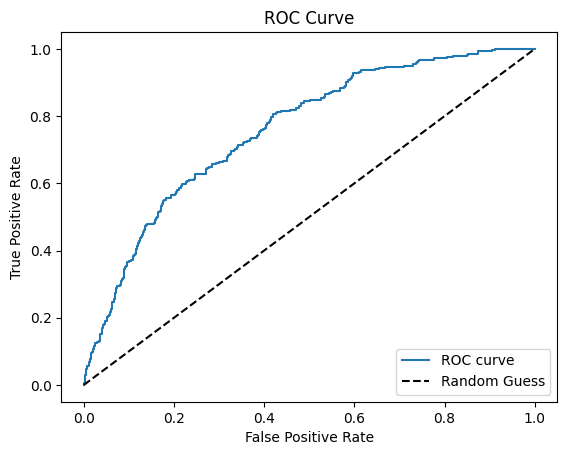



Method: Under Sample Fatality > 0.60
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1089
         1.0       0.44      0.48      0.46       282

    accuracy                           0.77      1371
   macro avg       0.65      0.66      0.66      1371
weighted avg       0.78      0.77      0.77      1371

Confusion Matrix:
[[917 172]
 [146 136]]
Accuracy Score: 0.7680525164113785
Precision: 0.44155844155844154
Recall: 0.48226950354609927
AUC: 0.6621632182560616


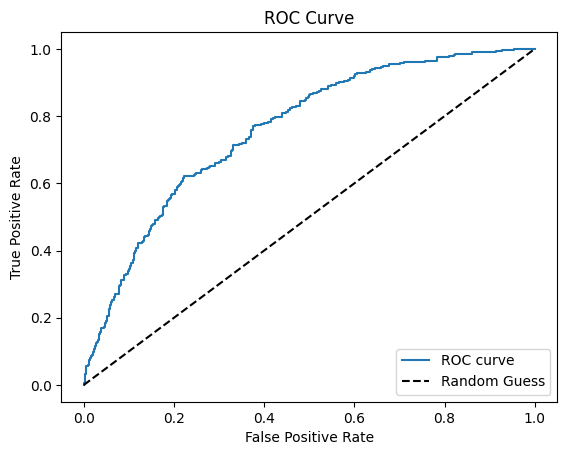



Method: Under Sample Fatality > 0.45
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1089
         1.0       0.47      0.40      0.43       282

    accuracy                           0.78      1371
   macro avg       0.66      0.64      0.65      1371
weighted avg       0.77      0.78      0.78      1371

Confusion Matrix:
[[963 126]
 [169 113]]
Accuracy Score: 0.7848285922684172
Precision: 0.47280334728033474
Recall: 0.40070921985815605
AUC: 0.6425033702596565


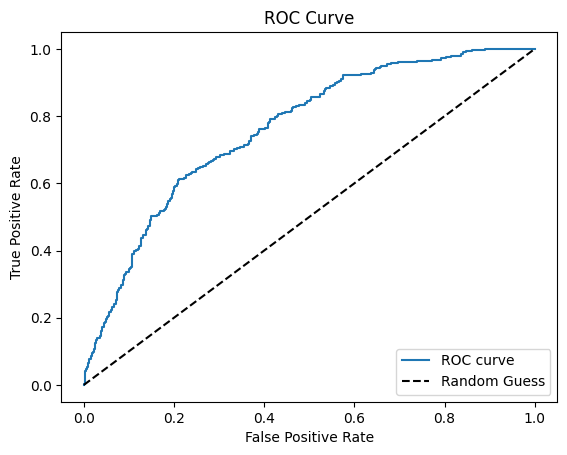



Method: SMOTE > 0.50
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1089
         1.0       0.46      0.42      0.44       282

    accuracy                           0.78      1371
   macro avg       0.66      0.65      0.65      1371
weighted avg       0.77      0.78      0.78      1371

Confusion Matrix:
[[951 138]
 [163 119]]
Accuracy Score: 0.7804522246535376
Precision: 0.46303501945525294
Recall: 0.4219858156028369
AUC: 0.6476320262587187


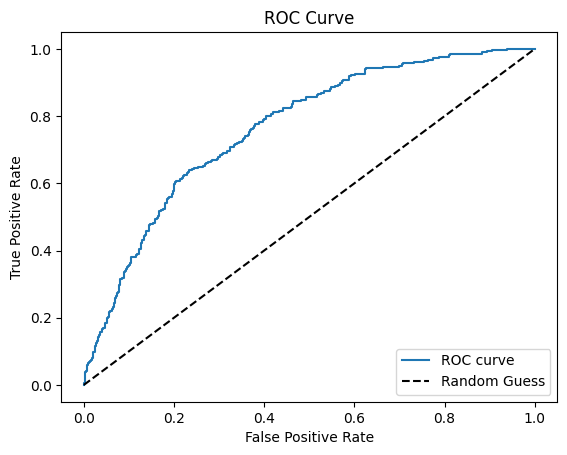



Method: SMOTE > 0.20
----------------------------------------


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Baseline model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
baseline_y_pred = baseline_model.predict(X_test)

# Display baseline model evaluation metrics
print("Baseline Model")
print('-' * 40)
print("Classification Report:")
print(classification_report(y_test, baseline_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, baseline_y_pred))
print("Accuracy Score:", accuracy_score(y_test, baseline_y_pred))
print("Precision:", precision_score(y_test, baseline_y_pred))
print("Recall:", recall_score(y_test, baseline_y_pred))
print("AUC:", roc_auc_score(y_test, baseline_y_pred))
print('\n')

# Iterate over each threshold and method
for threshold, method in zip(thresholds, methods):
    print("Method:", method)
    print('-' * 40)

    # Perform under-sampling based on the threshold
    under_sampler = RandomUnderSampler(sampling_strategy=threshold, random_state=42)
    X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)

    # Display classification report and evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred))

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('\n')

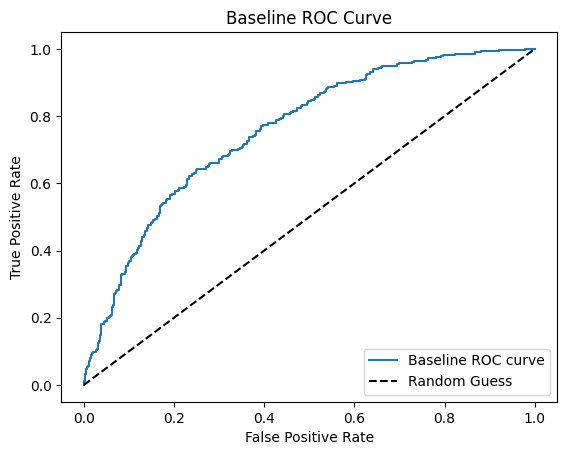

In [ ]:
# Compute ROC curve and AUC for the baseline model
baseline_fpr, baseline_tpr, baseline_thresholds = roc_curve(y_test, baseline_model.predict_proba(X_test)[:, 1])

# Plot ROC curve for the baseline model
plt.figure()
plt.plot(baseline_fpr, baseline_tpr, label='Baseline ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into features (X) and target variable (y)
X = final_df_selected.drop('severe_outcome', axis=1)
y = final_df_selected['severe_outcome']

# Handle missing values in X and y
X = X.fillna(0)  # Replace NaN values with 0
y = y.fillna(0)  # Replace NaN values with 0

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1104
         1.0       0.61      0.16      0.25       280

    accuracy                           0.81      1384
   macro avg       0.72      0.57      0.57      1384
weighted avg       0.78      0.81      0.76      1384

Confusion Matrix:
[[1076   28]
 [ 236   44]]
Accuracy Score: 0.8092485549132948
AUC: 0.5658902691511386


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Define the columns
numerical_cols = ['no_persons', 'speed_zone', 'condensed_years', 'total_no_occupants', 'year_of_vehicle']

cat_cols = ['sex', 'accident_type_desc', 'road_surface_type_desc_x', 'surface_cond_desc', 'atmosph_cond_desc',
            'light_condition_desc', 'deg_urban_name', 'age_group', 'day_week_description',
            'seatbelt_restraint_type_desc', 'traffic_control_desc_x', 'road_type_group',
            'condensed_vehicle_type', 'time_of_day', 'road_geometry_desc', 'condensed_no_of_vehicles',
            'season', 'road_user_type_desc']

indexing_cols = [ 'severe_outcome',  'road_user_type_desc']

# Create the new DataFrame
new_df = data_pre_process[numerical_cols + cat_cols + indexing_cols]

In [ ]:
data_pre_process.columns

Index(['accident_no', 'vehicle_id', 'sex', 'age_group', 'inj_level_desc',
       'seating_position', 'helmet_belt_worn', 'road_user_type',
       'road_user_type_desc', 'accidentdate', 'accidenttime',
       'accident_type_desc', 'day_week_description', 'dca_description',
       'light_condition_desc', 'no_persons', 'no_persons_killed',
       'road_geometry', 'road_geometry_desc', 'severity', 'speed_zone',
       'surface_cond_desc', 'road_name', 'road_type', 'distance_location',
       'lga_name', 'region_name', 'deg_urban_name', 'lat', 'long',
       'postcode_no', 'atmosph_cond_desc', 'vehicle_year_manuf',
       'road_surface_type_desc_x', 'vehicle_type_desc_x', 'total_no_occupants',
       'traffic_control_desc_x', 'severity_level', 'year_of_vehicle',
       'road_surface_type_desc_y', 'reg_state', 'vehicle_body_style',
       'vehicle_make', 'vehicle_model', 'condensed_vehicle_type',
       'condensed_total_occupants', 'condensed_no_of_vehicles', 'inj_binary',
       'severe_out

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into features (X) and target variable (y)
X = new_df.drop('severe_outcome', axis=1)
y = new_df['severe_outcome']

# Handle missing values in X and y
X = X.fillna(0)  # Replace NaN values with 0
y = y.fillna(0)  # Replace NaN values with 0

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      1089
         1.0       0.64      0.30      0.41       282

    accuracy                           0.82      1371
   macro avg       0.74      0.63      0.65      1371
weighted avg       0.80      0.82      0.80      1371

Confusion Matrix:
[[1041   48]
 [ 196   86]]
Accuracy Score: 0.8220277169948942
AUC: 0.6304437020104332
